In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import STL

# LOADING THE DATASET

In [ ]:
# Compiled dataset with weather variables
dsp_ts_dataset = r"COMPILED DATASET FILE PATH"
dsp_ts_df = pd.read_excel(dsp_ts_dataset)


# =================================
# Descriptive Analysis
# =================================

Describe the dataset: 
1) Identify the datatype
2) Identify the missing value
3) Identify outliers
4) Measure central tendency and Measure of spread


In [3]:
# Identify the datatype
dsp_ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Day                                                 1826 non-null   datetime64[ns]
 1   Month                                               1826 non-null   object        
 2   Year                                                1826 non-null   int64         
 3   Power Generation (MW)                               1826 non-null   int64         
 4   Precipitation (mm)                                  1824 non-null   float64       
 5   Minimum Temperature (deg C)                         1824 non-null   float64       
 6   Maximum Temperature (deg C)                         1824 non-null   float64       
 7   Mean Temperature (deg C)                            1824 non-null   float64       
 8   Mean Dew

## Identify the missing value

In [4]:
dsp_ts_df.isnull().sum()

Day                                                   0
Month                                                 0
Year                                                  0
Power Generation (MW)                                 0
Precipitation (mm)                                    2
Minimum Temperature (deg C)                           2
Maximum Temperature (deg C)                           2
Mean Temperature (deg C)                              2
Mean Dew Point Temperature (dec C)                    2
Hargreaves Potential Evaporation (mm)                 2
Potential Water Deficit (PPT- Hargreaves PET) (mm)    2
Wind Speed (m/s)                                      2
Eastward Wind Component (m/s)                         2
Northward Wind Component (m/s)                        2
Sea Level Pressure (kPa)                              2
Surface Pressure (kPa)                                2
dtype: int64

In [5]:
len(dsp_ts_df)

1826

In [6]:
dsp_ts_df

,Day,Month,Year,Power Generation (MW),Precipitation (mm),Minimum Temperature (deg C),Maximum Temperature (deg C),Mean Temperature (deg C),Mean Dew Point Temperature (dec C),Hargreaves Potential Evaporation (mm),Potential Water Deficit (PPT- Hargreaves PET) (mm),Wind Speed (m/s),Eastward Wind Component (m/s),Northward Wind Component (m/s),Sea Level Pressure (kPa),Surface Pressure (kPa)
0,2019-01-01,January,2019,1847,1.4460,20.4186,29.5281,24.1509,20.9383,4.0378,-2.5919,1.5995,-0.9421,-1.2926,101.4483,95.6548
1,2019-01-02,January,2019,1699,3.2084,20.4468,28.3602,24.5799,21.4949,3.7165,-0.5081,1.6056,-0.4366,-1.5451,101.4128,95.6191
2,2019-01-03,January,2019,1668,23.9188,21.1208,22.8943,22.0480,21.7623,1.6610,22.2578,1.3381,1.1046,-0.7552,101.3845,95.5730
3,2019-01-04,January,2019,1669,1.5491,20.2266,27.1919,23.2253,21.2197,3.4360,-1.8869,0.9481,0.5259,0.7888,101.3472,95.5504
4,2019-01-05,January,2019,1689,1.2982,20.7932,31.1363,25.4247,21.8802,4.4191,-3.1209,0.2301,-0.2299,-0.0105,101.2760,95.5036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2023-12-27,December,2023,3955,0.3729,22.9583,28.7265,25.0181,21.7488,3.2672,-2.8944,1.8494,-1.7013,-0.7252,101.4240,95.6364
1822,2023-12-28,December,2023,4666,4.2858,23.6170,29.2317,25.2186,22.6705,3.2683,1.0175,1.1557,-0.9600,-0.6435,101.2867,95.5059
1823,2023-12-29,December,2023,12846,7.9765,23.6043,29.1995,25.6189,23.2253,3.2630,4.7135,1.1606,-1.0609,-0.4708,101.2231,95.4480
1824,2023-12-30,December,2023,15627,8.5356,22.5392,28.6158,24.9505,23.0528,3.3393,5.1963,0.8394,-0.7917,-0.2790,101.2616,95.4798


In [7]:
dsp_ts_df.dropna(inplace=True)
len(dsp_ts_df)

1824

In [8]:
dsp_ts_df

,Day,Month,Year,Power Generation (MW),Precipitation (mm),Minimum Temperature (deg C),Maximum Temperature (deg C),Mean Temperature (deg C),Mean Dew Point Temperature (dec C),Hargreaves Potential Evaporation (mm),Potential Water Deficit (PPT- Hargreaves PET) (mm),Wind Speed (m/s),Eastward Wind Component (m/s),Northward Wind Component (m/s),Sea Level Pressure (kPa),Surface Pressure (kPa)
0,2019-01-01,January,2019,1847,1.4460,20.4186,29.5281,24.1509,20.9383,4.0378,-2.5919,1.5995,-0.9421,-1.2926,101.4483,95.6548
1,2019-01-02,January,2019,1699,3.2084,20.4468,28.3602,24.5799,21.4949,3.7165,-0.5081,1.6056,-0.4366,-1.5451,101.4128,95.6191
2,2019-01-03,January,2019,1668,23.9188,21.1208,22.8943,22.0480,21.7623,1.6610,22.2578,1.3381,1.1046,-0.7552,101.3845,95.5730
3,2019-01-04,January,2019,1669,1.5491,20.2266,27.1919,23.2253,21.2197,3.4360,-1.8869,0.9481,0.5259,0.7888,101.3472,95.5504
4,2019-01-05,January,2019,1689,1.2982,20.7932,31.1363,25.4247,21.8802,4.4191,-3.1209,0.2301,-0.2299,-0.0105,101.2760,95.5036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2023-12-27,December,2023,3955,0.3729,22.9583,28.7265,25.0181,21.7488,3.2672,-2.8944,1.8494,-1.7013,-0.7252,101.4240,95.6364
1822,2023-12-28,December,2023,4666,4.2858,23.6170,29.2317,25.2186,22.6705,3.2683,1.0175,1.1557,-0.9600,-0.6435,101.2867,95.5059
1823,2023-12-29,December,2023,12846,7.9765,23.6043,29.1995,25.6189,23.2253,3.2630,4.7135,1.1606,-1.0609,-0.4708,101.2231,95.4480
1824,2023-12-30,December,2023,15627,8.5356,22.5392,28.6158,24.9505,23.0528,3.3393,5.1963,0.8394,-0.7917,-0.2790,101.2616,95.4798


## Measure of Data Distribution

In [9]:
numeric_df = dsp_ts_df.select_dtypes(include=['number']).drop(['Year'], axis='columns', inplace=False)
numeric_df.describe()

,Power Generation (MW),Precipitation (mm),Minimum Temperature (deg C),Maximum Temperature (deg C),Mean Temperature (deg C),Mean Dew Point Temperature (dec C),Hargreaves Potential Evaporation (mm),Potential Water Deficit (PPT- Hargreaves PET) (mm),Wind Speed (m/s),Eastward Wind Component (m/s),Northward Wind Component (m/s),Sea Level Pressure (kPa),Surface Pressure (kPa)
count,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,5174.232456,8.364738,21.412416,30.039441,24.884795,21.952024,4.284613,4.080125,0.653311,-0.113854,-0.027917,101.144940,95.376585
std,3275.149741,9.823394,0.804831,1.867231,1.029033,1.207147,0.637614,10.065230,0.454180,0.680629,0.395378,0.133076,0.123673
min,0.000000,0.000000,17.178200,22.658800,21.081900,15.786900,1.661000,-6.265800,0.001400,-2.568200,-1.545100,100.727700,94.995500
25%,2538.500000,1.249275,20.978925,28.949300,24.186250,21.638625,3.948125,-3.074450,0.310400,-0.490825,-0.282500,101.057925,95.294300
50%,4289.000000,5.758100,21.467400,30.158550,24.878600,22.230350,4.321650,1.476100,0.549300,0.012400,-0.016450,101.144600,95.376650
75%,7061.000000,12.173750,21.919725,31.194050,25.572700,22.665275,4.666700,8.185950,0.884000,0.375200,0.233000,101.234800,95.459000
max,17018.000000,114.711600,23.617000,36.497600,28.361600,24.328500,6.360500,112.165500,2.766000,1.393900,1.551300,101.624400,95.819300


In [10]:
def generate_hist(df):
    numeric_df = df.select_dtypes(include=['number']).drop(['Year'], axis='columns', inplace=False)
    
    # Create a subplot figure with 5 rows and 2 columns (max 10 subplots per figure)
    fig = make_subplots(rows=7, cols=2, subplot_titles=numeric_df.columns[:15])
    
    # Add histograms for each numeric column
    for idx, col in enumerate(numeric_df.columns[:15]):
        row = idx // 2 + 1
        column = idx % 2 + 1
        
        # Add histogram trace for the current column
        fig.add_trace(go.Histogram(x=numeric_df[col]), row=row, col=column)
    
    # Update layout with consistent style and hide the legend
    fig.update_layout(template='plotly_white', 
                      title={
                            'text': 'Distribution of the Dataset',
                            'x': 0.5,  # Center the title
                            'xanchor': 'center',
                            'yanchor': 'top',
                            'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
                        },
                      height=1500, showlegend=False)
    
    # Show the figure
    fig.show()

In [11]:
generate_hist(dsp_ts_df)

In [12]:
# Create box plot for each column

def generate_box(df):
    # Select numeric columns, dropping 'Day' and 'Year'
    numeric_df = df.select_dtypes(include=['number']).drop(['Year'], axis='columns', inplace=False)
    
    # Create a subplot figure with 7 rows and 2 columns
    fig = make_subplots(rows=7, cols=2, subplot_titles=numeric_df.columns[:15])
    
    # Add box plots for each numeric column
    for idx, col in enumerate(numeric_df.columns[:15]):
        row = idx // 2 + 1
        column = idx % 2 + 1
        
        # Add box plot trace for the current column
        fig.add_trace(go.Box(x=numeric_df[col]), row=row, col=column)
    
    # Update layout with a consistent style and hide the legend
    fig.update_layout(
        template='plotly_white', 
        title={
            'text': 'Distribution of the Dataset',
            'x': 0.5,  # Center the title
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
        },
        height=1500,
        showlegend=False
    )
    
    # Show the figure
    fig.show()

In [13]:
generate_box(dsp_ts_df)

## Identify outliers using IQR

In [14]:
def find_outliers_iqr(df):
    # Filter numeric columns only
    numeric_df = df.select_dtypes(include=['number']).drop(['Year'], axis='columns', inplace=False)

    outlier_counts = {}
    total_outliers = 0  # Variable to store the total number of outliers

    # Calculate Q1, Q3, and IQR for numeric columns
    q1 = numeric_df.quantile(0.25)
    q3 = numeric_df.quantile(0.75)
    iqr = q3 - q1

    # Iterate through each numeric column to find and count outliers
    for col in numeric_df.columns:
        col_outliers = numeric_df[
            (numeric_df[col] < (q1[col] - 1.5 * iqr[col])) | (numeric_df[col] > (q3[col] + 1.5 * iqr[col]))]
        outlier_count = col_outliers[col].count()
        outlier_counts[col] = outlier_count  # Count the outliers in this column
        total_outliers += outlier_count  # Add to total outliers

    # Convert the dictionary of outlier counts into a DataFrame
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    outlier_counts_df['Outlier Percentage (%)'] = (outlier_counts_df['Outlier Count'] / len(numeric_df) * 100).round(2)

    return total_outliers, outlier_counts_df


In [15]:
total_outliers, outlier_counts_df = find_outliers_iqr(dsp_ts_df)
percentage_outliers = ((total_outliers / len(dsp_ts_df)) * 100).round(2)

print("Total number of outliers in the DataFrame:", total_outliers)
print(f"Percentage of outliers in the dataset:{percentage_outliers} %")
outlier_counts_df

Total number of outliers in the DataFrame: 618
Percentage of outliers in the dataset:33.88 %


,Column,Outlier Count,Outlier Percentage (%)
0,Power Generation (MW),30,1.64
1,Precipitation (mm),57,3.12
2,Minimum Temperature (deg C),55,3.02
3,Maximum Temperature (deg C),48,2.63
4,Mean Temperature (deg C),18,0.99
5,Mean Dew Point Temperature (dec C),147,8.06
6,Hargreaves Potential Evaporation (mm),76,4.17
7,Potential Water Deficit (PPT- Hargreaves PET) ...,54,2.96
8,Wind Speed (m/s),51,2.80
9,Eastward Wind Component (m/s),24,1.32


## Removing outliers using IQR

In [16]:
def remove_outliers_iqr(df):
    # Filter numeric columns only, excluding 'Year' if it exists
    numeric_df = df.select_dtypes(include=['number']).drop(['Year'], axis='columns', errors='ignore')

    # Start with the original DataFrame
    filtered_df = df.copy()

    # Calculate Q1, Q3, and IQR for each numeric column and filter out outliers
    for col in numeric_df.columns:
        Q1 = numeric_df[col].quantile(0.25)
        Q3 = numeric_df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers for the current column
        filtered_df = filtered_df[(filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)]

    return filtered_df

# Usage
df_no_outliers = remove_outliers_iqr(dsp_ts_df)
print("Data without outliers:\n")
df_no_outliers.info()

Data without outliers:

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 3 to 1815
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Day                                                 1497 non-null   datetime64[ns]
 1   Month                                               1497 non-null   object        
 2   Year                                                1497 non-null   int64         
 3   Power Generation (MW)                               1497 non-null   int64         
 4   Precipitation (mm)                                  1497 non-null   float64       
 5   Minimum Temperature (deg C)                         1497 non-null   float64       
 6   Maximum Temperature (deg C)                         1497 non-null   float64       
 7   Mean Temperature (deg C)                            1497 non-null   float64  

In [17]:
df_no_outliers_2 = remove_outliers_iqr(df_no_outliers)
print("Data without outliers:\n")

total_outliers_2, outlier_counts_df_2 = find_outliers_iqr(df_no_outliers)
percentage_outliers_2 = ((total_outliers_2 / len(df_no_outliers)) * 100).round(2)

print("Total number of outliers in the DataFrame:", total_outliers_2)
print(f"Percentage of outliers in the dataset:{percentage_outliers_2} %")

Data without outliers:

Total number of outliers in the DataFrame: 207
Percentage of outliers in the dataset:13.83 %


In [18]:
df_no_outliers_3 = remove_outliers_iqr(df_no_outliers_2)
print("Data without outliers:\n")

total_outliers_3, outlier_counts_df_3 = find_outliers_iqr(df_no_outliers_2)
percentage_outliers_3 = ((total_outliers_3 / len(df_no_outliers_2)) * 100).round(2)

print("Total number of outliers in the DataFrame:", total_outliers_3)
print(f"Percentage of outliers in the dataset:{percentage_outliers_3} %")

Data without outliers:

Total number of outliers in the DataFrame: 64
Percentage of outliers in the dataset:4.73 %


In [19]:
df_no_outliers_4 = remove_outliers_iqr(df_no_outliers_3)
print("Data without outliers:\n")

total_outliers_4, outlier_counts_df_4 = find_outliers_iqr(df_no_outliers_3)
percentage_outliers_4 = ((total_outliers_4 / len(df_no_outliers_3)) * 100).round(2)

print("Total number of outliers in the DataFrame:", total_outliers_4)
print(f"Percentage of outliers in the dataset:{percentage_outliers_4} %")

Data without outliers:

Total number of outliers in the DataFrame: 22
Percentage of outliers in the dataset:1.7 %


In [47]:
df_no_outliers_5 = remove_outliers_iqr(df_no_outliers_4)
print("Data without outliers:\n")

total_outliers_5, outlier_counts_df_5 = find_outliers_iqr(df_no_outliers_4)
percentage_outliers_5 = ((total_outliers_5 / len(df_no_outliers_4)) * 100).round(2)

print("Total number of outliers in the DataFrame:", total_outliers_5)
print(f"Percentage of outliers in the dataset:{percentage_outliers_5} %")
outlier_counts_df_5

Data without outliers:

Total number of outliers in the DataFrame: 14
Percentage of outliers in the dataset:1.1 %


,Column,Outlier Count,Outlier Percentage (%)
0,Power Generation (MW),0,0.00
1,Precipitation (mm),0,0.00
2,Minimum Temperature (deg C),0,0.00
3,Maximum Temperature (deg C),0,0.00
4,Mean Temperature (deg C),0,0.00
5,Mean Dew Point Temperature (dec C),0,0.00
6,Hargreaves Potential Evaporation (mm),3,0.24
7,Potential Water Deficit (PPT- Hargreaves PET) ...,0,0.00
8,Wind Speed (m/s),0,0.00
9,Eastward Wind Component (m/s),10,0.78


In [21]:
box_no_outlier = generate_box(df_no_outliers_5)

In [22]:
hist_no_outlier = generate_hist(df_no_outliers_5)

## ========================
## Save cleaned the dataset
## ========================

In [ ]:
# save the cleaned dataset
file_path = r"CLEANED DATASET (NO OUTLIERS)"
df_no_outliers_5.to_excel(file_path, index=False)

# =================================
# Exploratory Data Analysis (EDA)
# =================================

In [ ]:
# Create the plot using Plotly Express
pwr_line = px.line(df_no_outliers_5, x = 'Day',y='Power Generation (MW)')

# Customize the layout
pwr_line.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    width = 2000,
    height=700,
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Temenggor Plant Hydropower Generation 2019 - 2023',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
pwr_line.show()

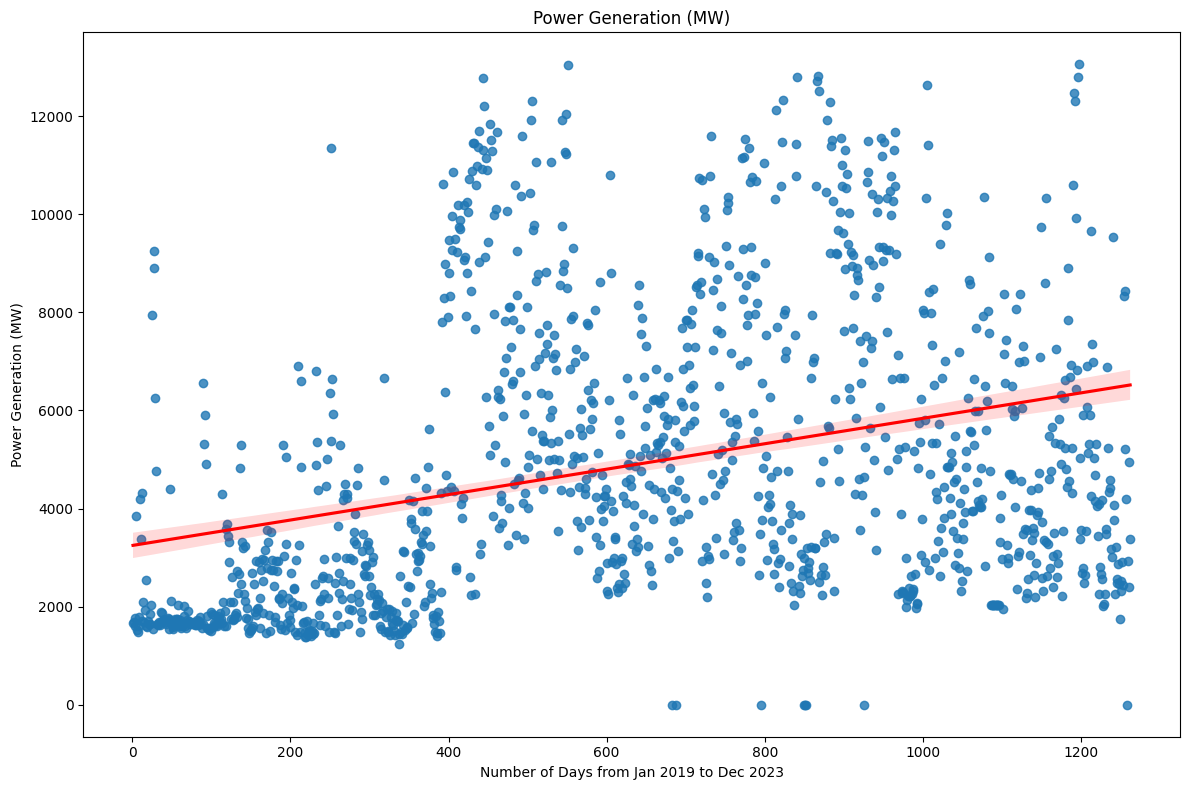

In [25]:
# Create a new column for month numbers
df_no_outliers_5['Day'] = range(1, len(df_no_outliers_5) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_no_outliers_5, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
# Set up the figure with Plotly
pwr_box = go.Figure()

# Group the data by year and create box plots for each year
for year, group in df_no_outliers_5.groupby('Year'):
    pwr_box.add_trace(go.Box(
        x=group['Year'],  # Set x-axis as the year
        y=group['Power Generation (MW)'],  # Change this to the column you're interested in
        name=str(year),  # Name the box plot trace by year
        boxmean=True,  # Include the mean in the box plot
        showlegend=False,
        boxpoints=False
    ))

# Update layout
pwr_box.update_layout(
    title='<b>Power Generation (MW) per Year</b>',
    xaxis_title='Year',
    yaxis_title='Power Generation (MW)',
    height=700,
    template='plotly_white',
    title_x=0.5,
    title_xanchor='center'
)

# Show the plot
pwr_box.show()

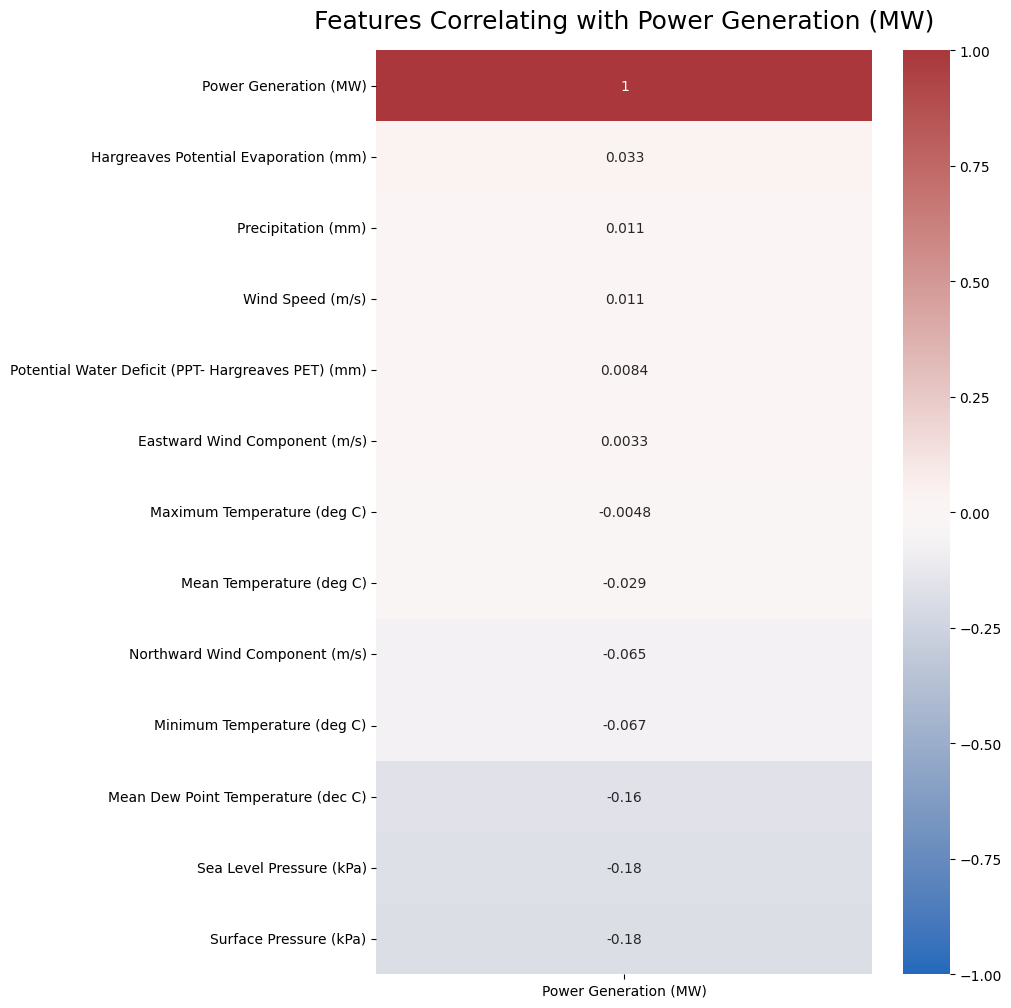

In [27]:
plt.figure(figsize=(8, 12))
numeric_df_no_outliers = df_no_outliers_5.drop(labels=['Day', 'Month', 'Year'], axis=1)

heatmap = sns.heatmap(
numeric_df_no_outliers.corr(method='pearson')[['Power Generation (MW)']].sort_values(by='Power Generation (MW)', ascending=False), vmin=-1,
vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Features Correlating with Power Generation (MW)', fontdict={'fontsize': 18}, pad=16);

## Data filtering by years

In [28]:
df_total_pwr_2023 = df_no_outliers.query("Day >= '2023-01-01'")
df_total_pwr_2022 = df_no_outliers.query("Day < '2023-01-01' and Day >= '2022-01-01'")
df_total_pwr_2021 = df_no_outliers.query("Day < '2022-01-01' and Day >= '2021-01-01'")
df_total_pwr_2020 = df_no_outliers.query("Day < '2021-01-01' and Day >= '2020-01-01'")
df_total_pwr_2019 = df_no_outliers.query("Day < '2020-01-01' and Day >= '2019-01-01'")

## --------------------
## EDA Year 2023
## --------------------

In [29]:
year = '2023'

# Create the plot using Plotly Express
pwr_line_2023 = px.line(df_total_pwr_2023, x = 'Day',y='Power Generation (MW)')

# Customize the layout
pwr_line_2023.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Hydropower Generation in {year}',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
pwr_line_2023.show()

C:\Users\Qaedi's PC\AppData\Local\Temp\ipykernel_2696\1303129606.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



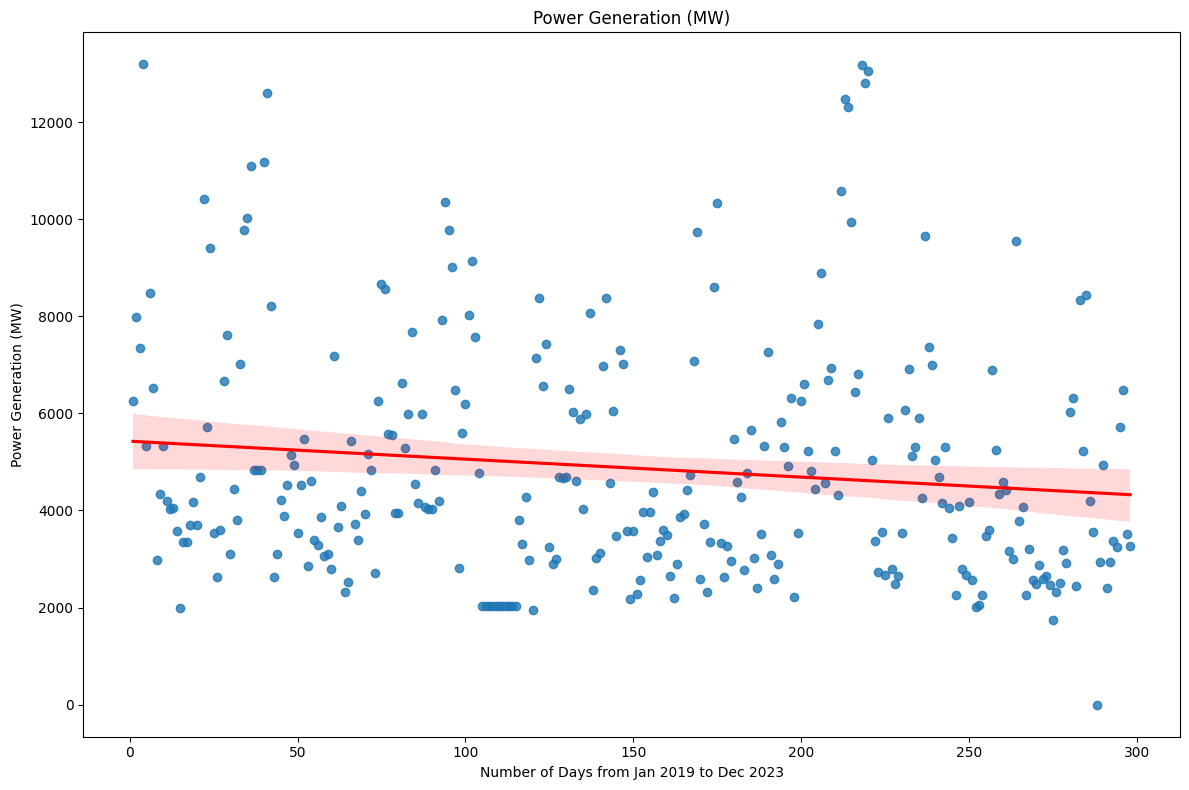

In [30]:
# Create a new column for month numbers
df_total_pwr_2023['Day'] = range(1, len(df_total_pwr_2023) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_total_pwr_2023, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [31]:
fig_pwr_pressure_2023 = make_subplots(rows=5, cols=1,shared_xaxes=True)

# Power Generation (MW)
fig_pwr_pressure_2023.add_trace(
    go.Box(x=df_total_pwr_2023['Month'], y=df_total_pwr_2023['Power Generation (MW)'], name='Power Generation (MW)'),
    row=1, col=1)

# Minimum Temperature (deg C)
fig_pwr_pressure_2023.add_trace(
    go.Box(x=df_total_pwr_2023['Month'], y=df_total_pwr_2023['Minimum Temperature (deg C)'], name='Minimum Temperature (deg C)'),
    row=2, col=1)

# Mean Dew Point Temperature (dec C)
fig_pwr_pressure_2023.add_trace(
    go.Box(x=df_total_pwr_2023['Month'], y=df_total_pwr_2023['Mean Dew Point Temperature (dec C)'], name='Mean Dew Point Temperature (dec C)'),
    row=3, col=1)

# Sea Level Pressure (kPa)
fig_pwr_pressure_2023.add_trace(
    go.Box(x=df_total_pwr_2023['Month'], y=df_total_pwr_2023['Sea Level Pressure (kPa)'], name='Sea Level Pressure (kPa)'),
    row=4, col=1)

# Surface Pressure (kPa)
fig_pwr_pressure_2023.add_trace(
    go.Box(x=df_total_pwr_2023['Month'], y=df_total_pwr_2023['Surface Pressure (kPa)'], name='Surface Pressure (kPa)'),
    row=5, col=1)

# Update layout
fig_pwr_pressure_2023.update_layout(
    height=1000,
    template='plotly_white',
    title_text='Hydropower Generation (MW) VS Highly Correlated Variables for 2023')

fig_pwr_pressure_2023.show()


## -----------------
## EDA Year 2022
## -----------------

In [32]:
year = '2022'

# Create the plot using Plotly Express
fig2 = px.line(df_total_pwr_2022, x = 'Day', y='Power Generation (MW)')

# Customize the layout
fig2.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Hydropower Generation in {year}',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
fig2.show()

C:\Users\Qaedi's PC\AppData\Local\Temp\ipykernel_2696\1126973372.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



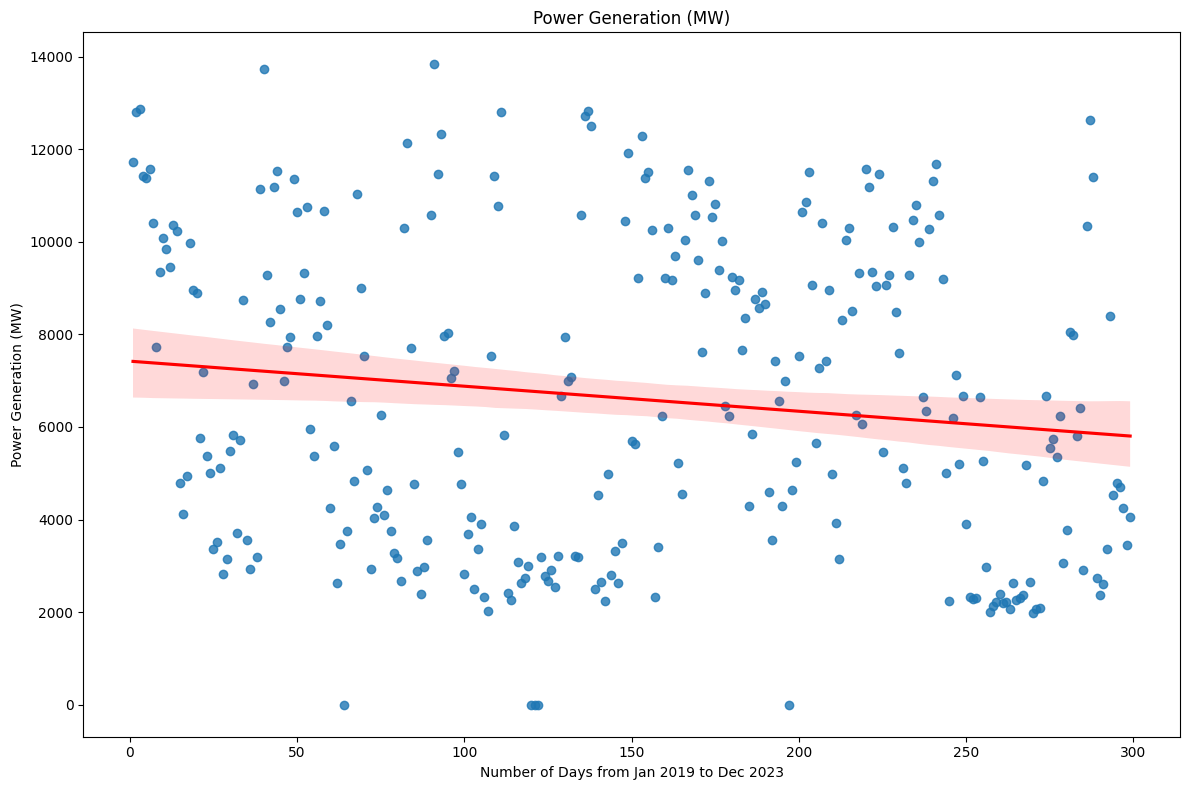

In [33]:
# Create a new column for month numbers
df_total_pwr_2022['Day'] = range(1, len(df_total_pwr_2022) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_total_pwr_2022, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
fig_pwr_pressure_2022 = make_subplots(rows=5, cols=1,shared_xaxes=True)

# Power Generation (MW)
fig_pwr_pressure_2022.add_trace(
    go.Box(x=df_total_pwr_2022['Month'], y=df_total_pwr_2022['Power Generation (MW)'], name='Power Generation (MW)'),
    row=1, col=1)

# Minimum Temperature (deg C)
fig_pwr_pressure_2022.add_trace(
    go.Box(x=df_total_pwr_2022['Month'], y=df_total_pwr_2022['Minimum Temperature (deg C)'], name='Minimum Temperature (deg C)'),
    row=2, col=1)

# Mean Dew Point Temperature (dec C)
fig_pwr_pressure_2022.add_trace(
    go.Box(x=df_total_pwr_2022['Month'], y=df_total_pwr_2022['Mean Dew Point Temperature (dec C)'], name='Mean Dew Point Temperature (dec C)'),
    row=3, col=1)

# Sea Level Pressure (kPa)
fig_pwr_pressure_2022.add_trace(
    go.Box(x=df_total_pwr_2022['Month'], y=df_total_pwr_2022['Sea Level Pressure (kPa)'], name='Sea Level Pressure (kPa)'),
    row=4, col=1)

# Surface Pressure (kPa)
fig_pwr_pressure_2022.add_trace(
    go.Box(x=df_total_pwr_2022['Month'], y=df_total_pwr_2022['Surface Pressure (kPa)'], name='Surface Pressure (kPa)'),
    row=5, col=1)

# Update layout
fig_pwr_pressure_2022.update_layout(
    height=1000,
    template='plotly_white',
    title_text='Hydropower Generation (MW) VS Highly Correlated Variables for 2022')

fig_pwr_pressure_2022.show()

## -----------------
## EDA Year 2021
## -----------------

In [35]:
year = '2021'

# Create the plot using Plotly Express
fig2 = px.line(df_total_pwr_2021, x = 'Day', y='Power Generation (MW)')

# Customize the layout
fig2.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Hydropower Generation in {year}',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
fig2.show()

C:\Users\Qaedi's PC\AppData\Local\Temp\ipykernel_2696\2324427975.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



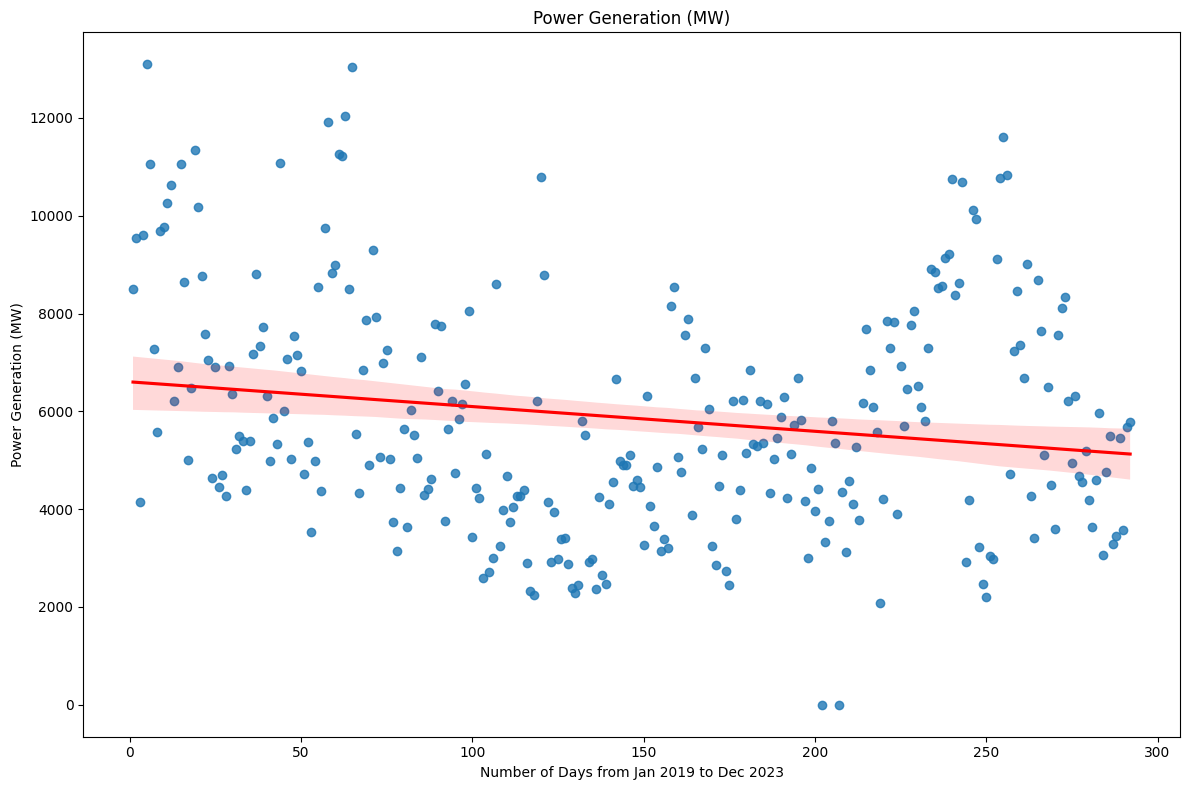

In [36]:
# Create a new column for month numbers
df_total_pwr_2021['Day'] = range(1, len(df_total_pwr_2021) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_total_pwr_2021, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [37]:
fig_pwr_pressure_2021 = make_subplots(rows=5, cols=1,shared_xaxes=True)

# Power Generation (MW)
fig_pwr_pressure_2021.add_trace(
    go.Box(x=df_total_pwr_2021['Month'], y=df_total_pwr_2021['Power Generation (MW)'], name='Power Generation (MW)'),
    row=1, col=1)

# Minimum Temperature (deg C)
fig_pwr_pressure_2021.add_trace(
    go.Box(x=df_total_pwr_2021['Month'], y=df_total_pwr_2021['Minimum Temperature (deg C)'], name='Minimum Temperature (deg C)'),
    row=2, col=1)

# Mean Dew Point Temperature (dec C)
fig_pwr_pressure_2021.add_trace(
    go.Box(x=df_total_pwr_2021['Month'], y=df_total_pwr_2021['Mean Dew Point Temperature (dec C)'], name='Mean Dew Point Temperature (dec C)'),
    row=3, col=1)

# Sea Level Pressure (kPa)
fig_pwr_pressure_2021.add_trace(
    go.Box(x=df_total_pwr_2021['Month'], y=df_total_pwr_2021['Sea Level Pressure (kPa)'], name='Sea Level Pressure (kPa)'),
    row=4, col=1)

# Surface Pressure (kPa)
fig_pwr_pressure_2021.add_trace(
    go.Box(x=df_total_pwr_2021['Month'], y=df_total_pwr_2021['Surface Pressure (kPa)'], name='Surface Pressure (kPa)'),
    row=5, col=1)

# Update layout
fig_pwr_pressure_2021.update_layout(
    height=1000,
    template='plotly_white',
    title_text='Hydropower Generation (MW) VS Highly Correlated Variables for 2021')

fig_pwr_pressure_2021.show()

## -----------------
## EDA Year 2020
## -----------------

In [38]:
year = '2020'

# Create the plot using Plotly Express
fig3 = px.line(df_total_pwr_2020, x = 'Day', y='Power Generation (MW)')

# Customize the layout
fig3.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Hydropower Generation in {year}',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
fig3.show()

C:\Users\Qaedi's PC\AppData\Local\Temp\ipykernel_2696\2055841931.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



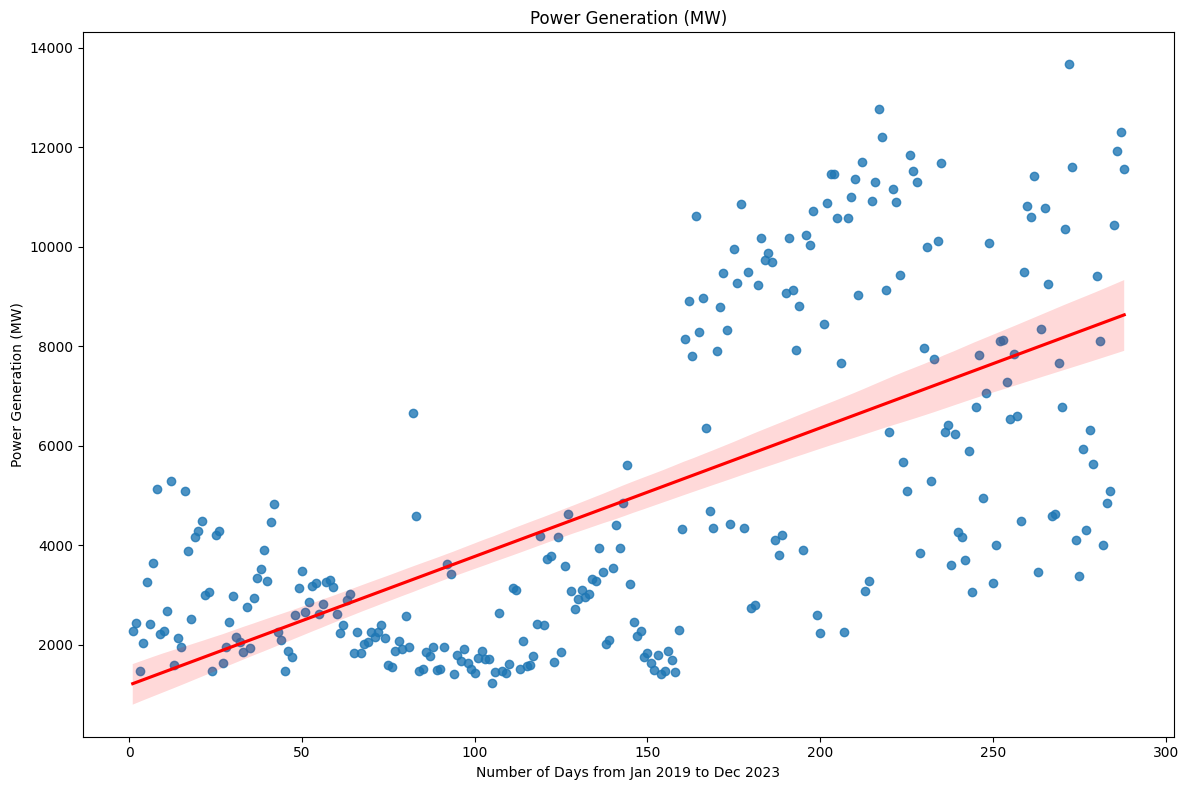

In [39]:
# Create a new column for month numbers
df_total_pwr_2020['Day'] = range(1, len(df_total_pwr_2020) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_total_pwr_2020, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [40]:
fig_pwr_pressure_2020 = make_subplots(rows=5, cols=1,shared_xaxes=True)

# Power Generation (MW)
fig_pwr_pressure_2020.add_trace(
    go.Box(x=df_total_pwr_2020['Month'], y=df_total_pwr_2020['Power Generation (MW)'], name='Power Generation (MW)'),
    row=1, col=1)

# Minimum Temperature (deg C)
fig_pwr_pressure_2020.add_trace(
    go.Box(x=df_total_pwr_2020['Month'], y=df_total_pwr_2020['Minimum Temperature (deg C)'], name='Minimum Temperature (deg C)'),
    row=2, col=1)

# Mean Dew Point Temperature (dec C)
fig_pwr_pressure_2020.add_trace(
    go.Box(x=df_total_pwr_2020['Month'], y=df_total_pwr_2020['Mean Dew Point Temperature (dec C)'], name='Mean Dew Point Temperature (dec C)'),
    row=3, col=1)

# Sea Level Pressure (kPa)
fig_pwr_pressure_2020.add_trace(
    go.Box(x=df_total_pwr_2020['Month'], y=df_total_pwr_2020['Sea Level Pressure (kPa)'], name='Sea Level Pressure (kPa)'),
    row=4, col=1)

# Surface Pressure (kPa)
fig_pwr_pressure_2020.add_trace(
    go.Box(x=df_total_pwr_2020['Month'], y=df_total_pwr_2020['Surface Pressure (kPa)'], name='Surface Pressure (kPa)'),
    row=5, col=1)

# Update layout
fig_pwr_pressure_2020.update_layout(
    height=1000,
    template='plotly_white',
    title_text='Hydropower Generation (MW) VS Highly Correlated Variables for 2020')

fig_pwr_pressure_2020.show()

## -----------------
## EDA Year 2019
## -----------------

In [41]:
year = '2019'

# Create the plot using Plotly Express
fig2 = px.line(df_total_pwr_2019, x = 'Day', y='Power Generation (MW)')

# Customize the layout
fig2.update_layout(
    xaxis_title='Days',
    yaxis_title='Power Generation (MW)',
    font=dict(size=18),
    template='plotly_white',  # Similar to seaborn's 'whitegrid' style
    title={
        'text': f'Hydropower Generation in {year}',
        'x': 0.5,  # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 24, 'family': 'Arial, sans-serif', 'color': 'black', 'weight': 'bold'}
    }  # Center the title
)

# Display the plot
fig2.show()

C:\Users\Qaedi's PC\AppData\Local\Temp\ipykernel_2696\2363164849.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



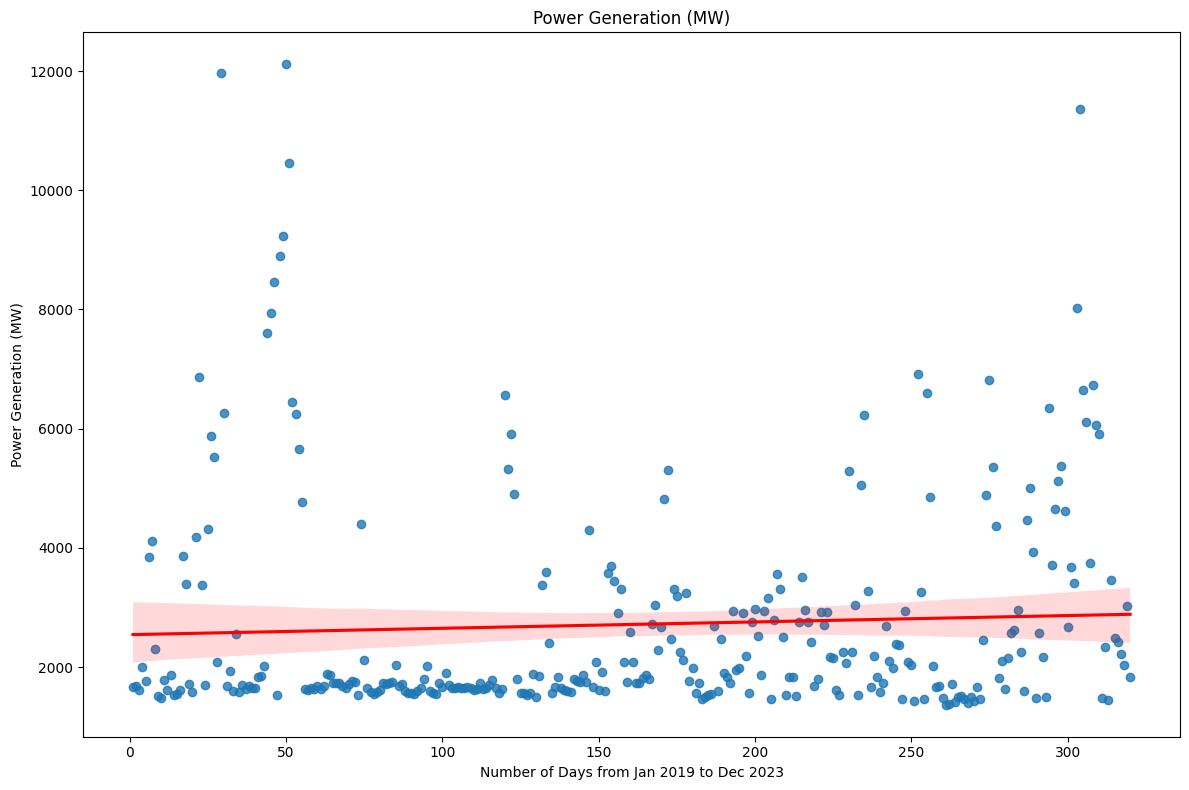

In [42]:
# Create a new column for month numbers
df_total_pwr_2019['Day'] = range(1, len(df_total_pwr_2019) + 1)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Power Generation with trend line
sns.regplot(x='Day', y='Power Generation (MW)', data=df_total_pwr_2019, scatter=True, line_kws={'color': 'red'})

# Set plot title and labels
plt.title('Power Generation (MW)')
plt.ylabel('Power Generation (MW)')
plt.xlabel('Number of Days from Jan 2019 to Dec 2023')

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
fig_pwr_pressure_2019 = make_subplots(rows=5, cols=1,shared_xaxes=True)

# Power Generation (MW)
fig_pwr_pressure_2019.add_trace(
    go.Box(x=df_total_pwr_2019['Month'], y=df_total_pwr_2019['Power Generation (MW)'], name='Power Generation (MW)'),
    row=1, col=1)

# Minimum Temperature (deg C)
fig_pwr_pressure_2019.add_trace(
    go.Box(x=df_total_pwr_2019['Month'], y=df_total_pwr_2019['Minimum Temperature (deg C)'], name='Minimum Temperature (deg C)'),
    row=2, col=1)

# Mean Dew Point Temperature (dec C)
fig_pwr_pressure_2019.add_trace(
    go.Box(x=df_total_pwr_2019['Month'], y=df_total_pwr_2019['Mean Dew Point Temperature (dec C)'], name='Mean Dew Point Temperature (dec C)'),
    row=3, col=1)

# Sea Level Pressure (kPa)
fig_pwr_pressure_2019.add_trace(
    go.Box(x=df_total_pwr_2019['Month'], y=df_total_pwr_2019['Sea Level Pressure (kPa)'], name='Sea Level Pressure (kPa)'),
    row=4, col=1)

# Surface Pressure (kPa)
fig_pwr_pressure_2019.add_trace(
    go.Box(x=df_total_pwr_2019['Month'], y=df_total_pwr_2019['Surface Pressure (kPa)'], name='Surface Pressure (kPa)'),
    row=5, col=1)

# Update layout
fig_pwr_pressure_2019.update_layout(
    height=1000,
    template='plotly_white',
    title_text='Hydropower Generation (MW) VS Highly Correlated Variables for 2023')

fig_pwr_pressure_2019.show()

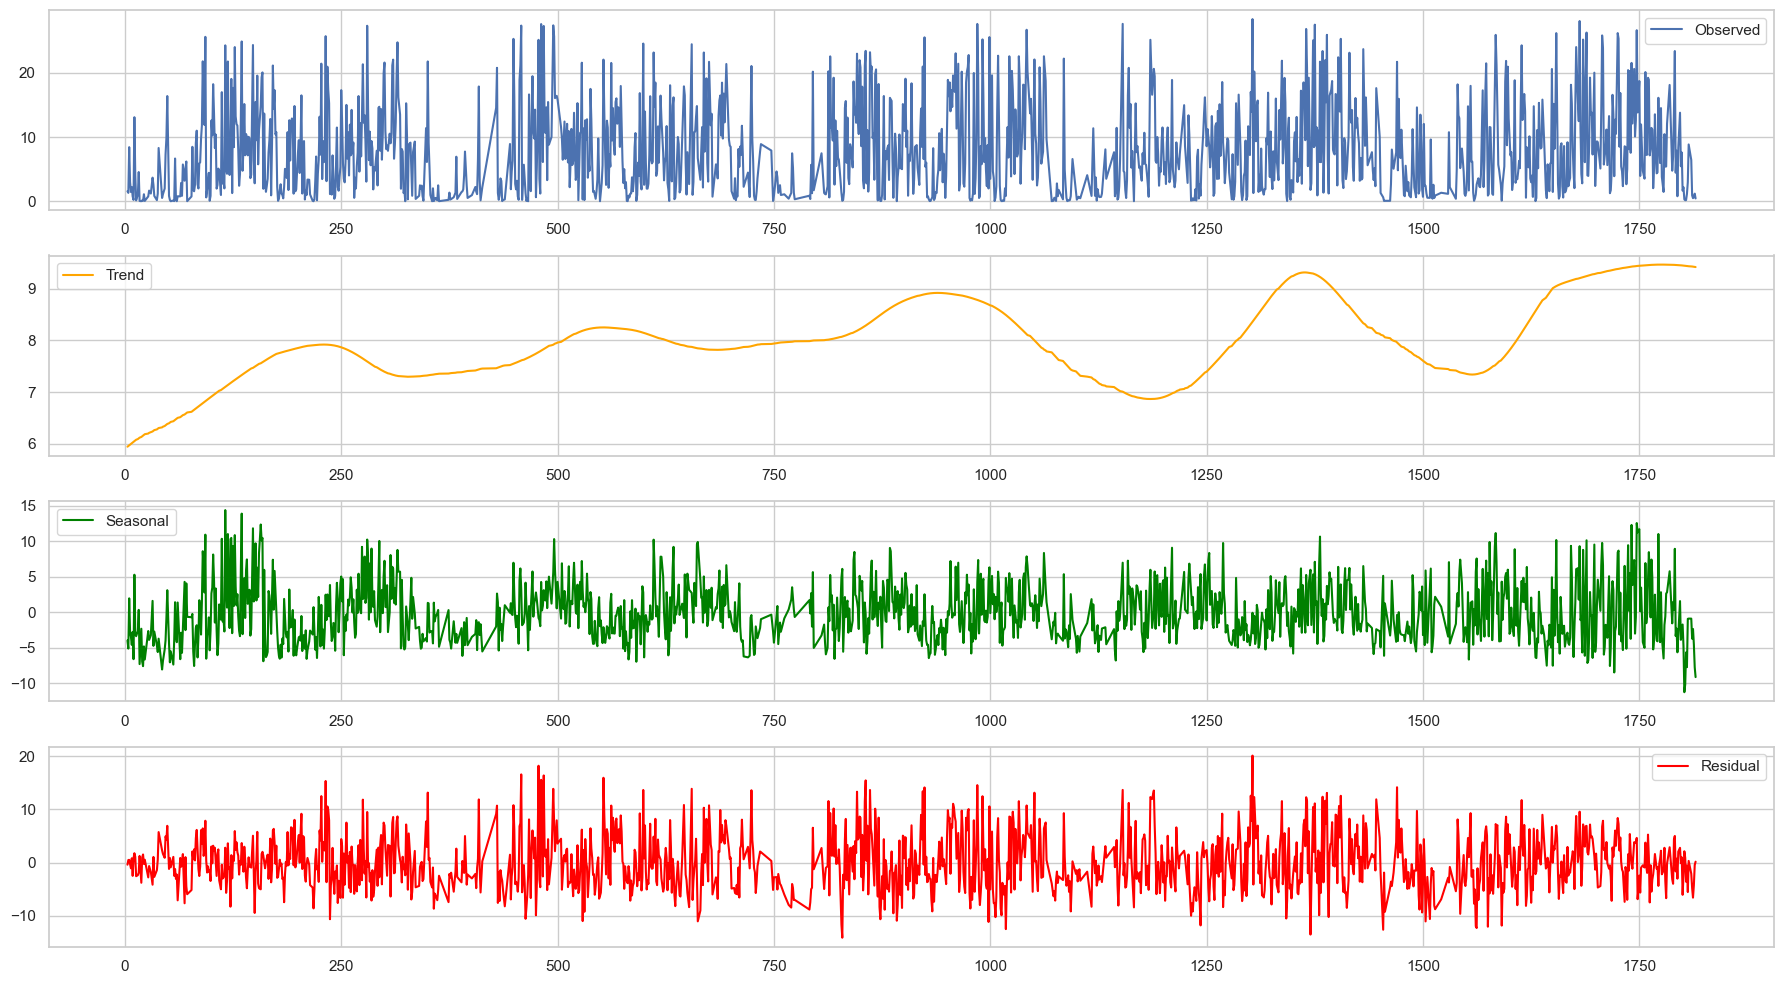

In [77]:
# STL decomposition

# STL decomposition with a period (e.g., 7 for weekly data)
stl = STL(df_no_outliers['Precipitation (mm)'], period=153)
res = stl.fit()

# Create a custom-sized plot
plt.figure(figsize=(18, 10))

# Plot each component
plt.subplot(4, 1, 1)
plt.plot(df_no_outliers['Precipitation (mm)'], label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(res.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(res.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(res.resid, label='Residual', color='red')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

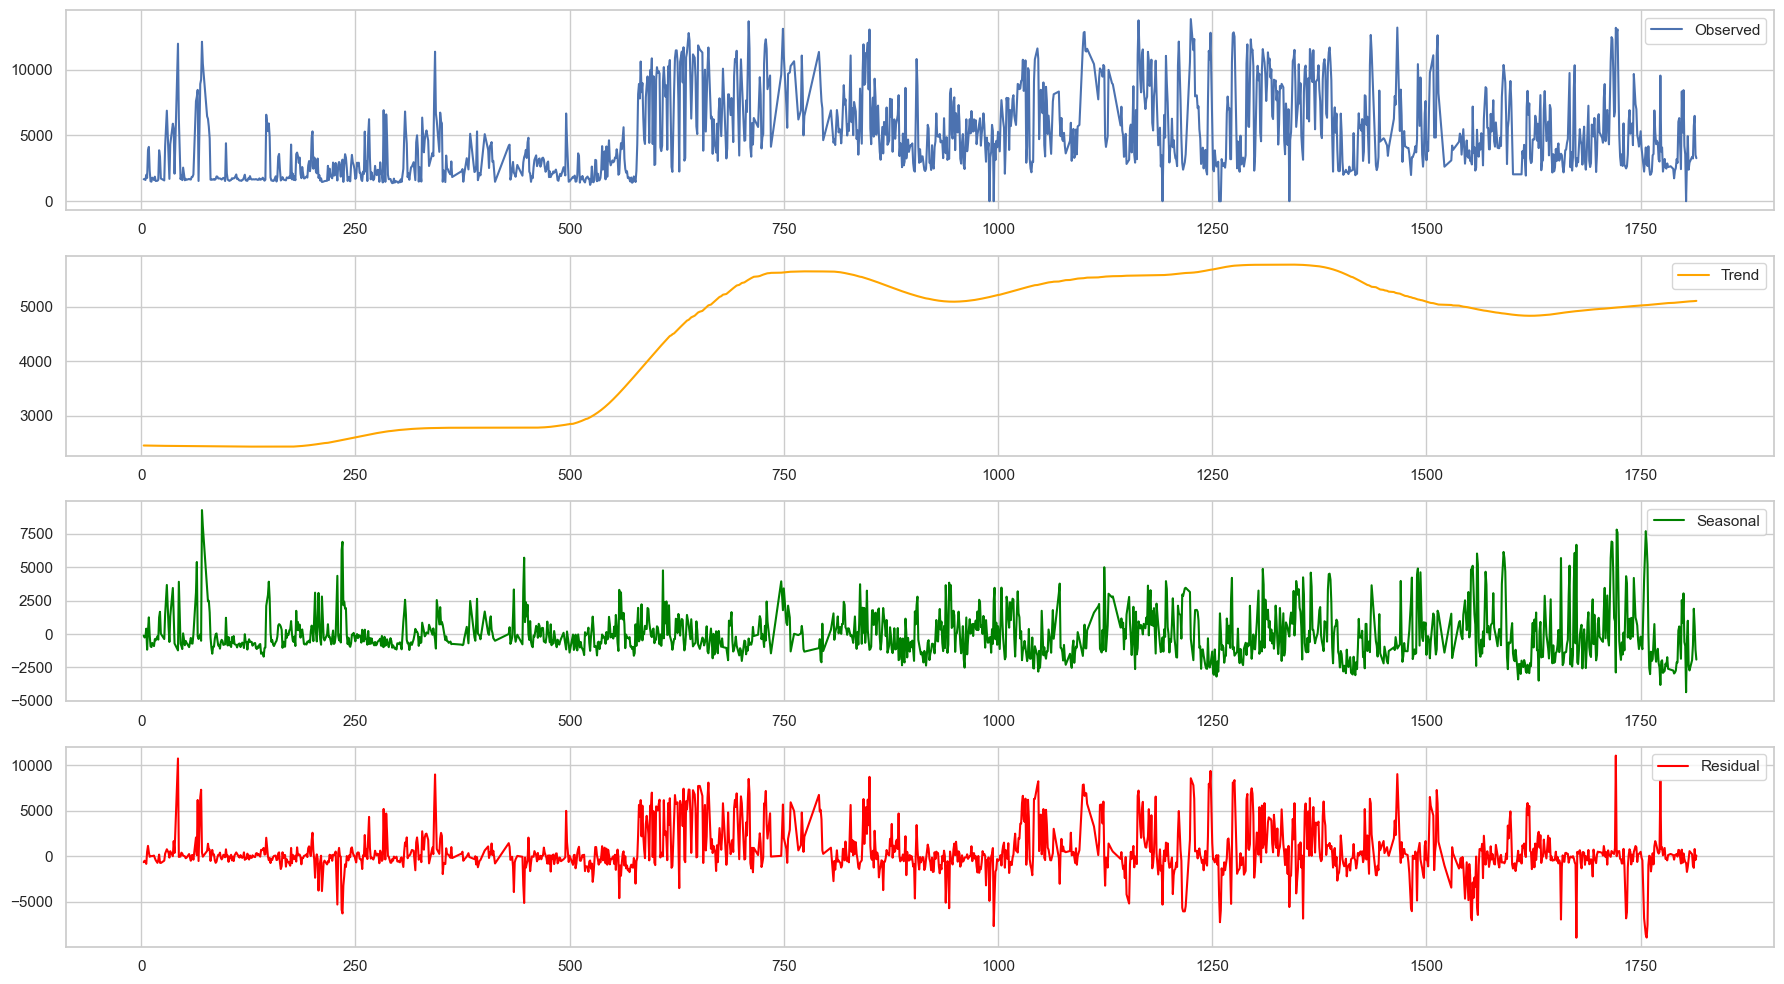

In [71]:
# STL decomposition

# STL decomposition with a period (e.g., 7 for weekly data)
stl = STL(df_no_outliers['Power Generation (MW)'], period=153)
res = stl.fit()

# Create a custom-sized plot
plt.figure(figsize=(18, 10))

# Plot each component
plt.subplot(4, 1, 1)
plt.plot(df_no_outliers['Power Generation (MW)'], label='Observed')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(res.trend, label='Trend', color='orange')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(res.seasonal, label='Seasonal', color='green')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(res.resid, label='Residual', color='red')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()